TRENDS AND INSIGHTS

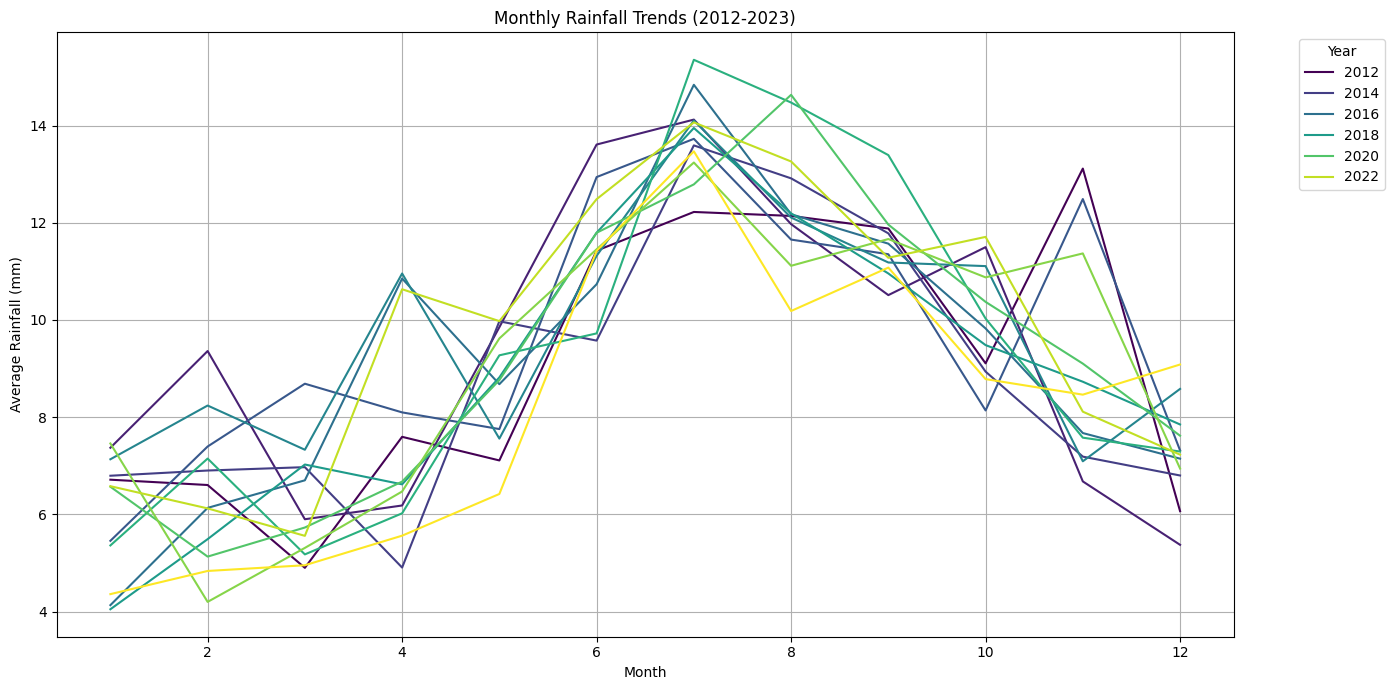

C:\Users\Lenoo\AppData\Local\Temp\ipykernel_5264\175197016.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_total, x='YEAR', y='RAINFALL', palette='coolwarm')


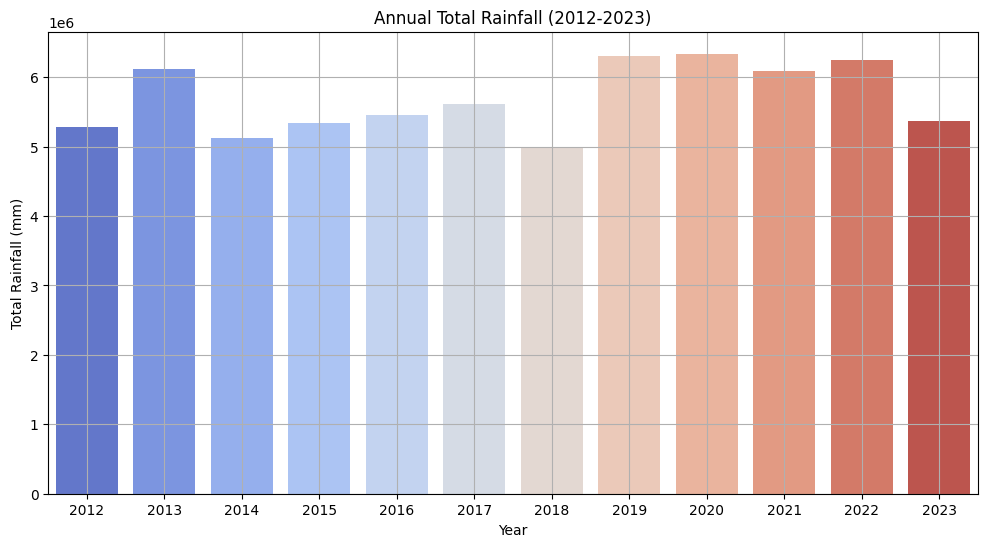

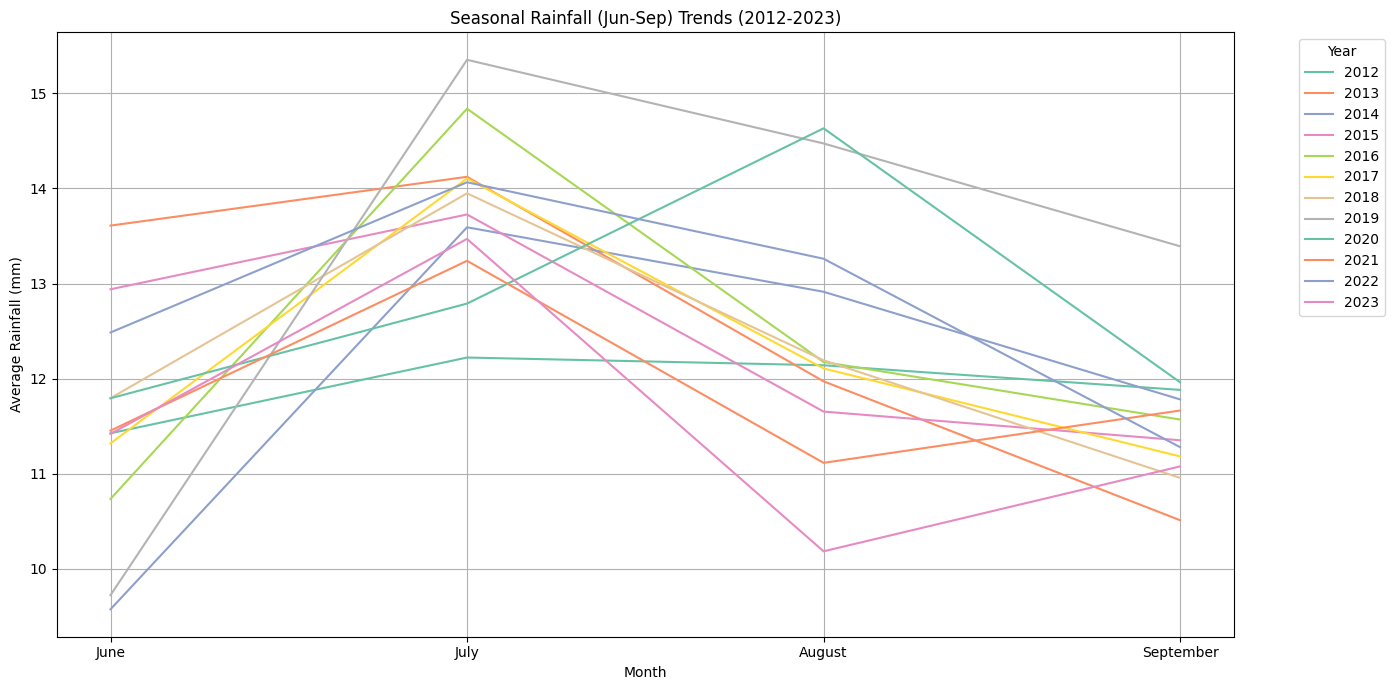

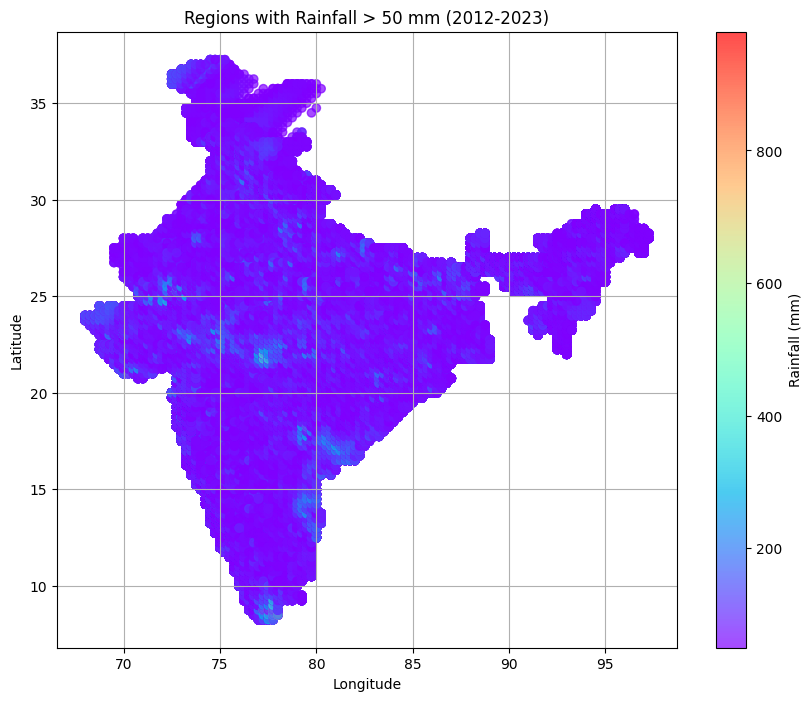

C:\Users\Lenoo\AppData\Local\Temp\ipykernel_5264\175197016.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_seasonal_total, x='YEAR', y='RAINFALL', palette='cool')


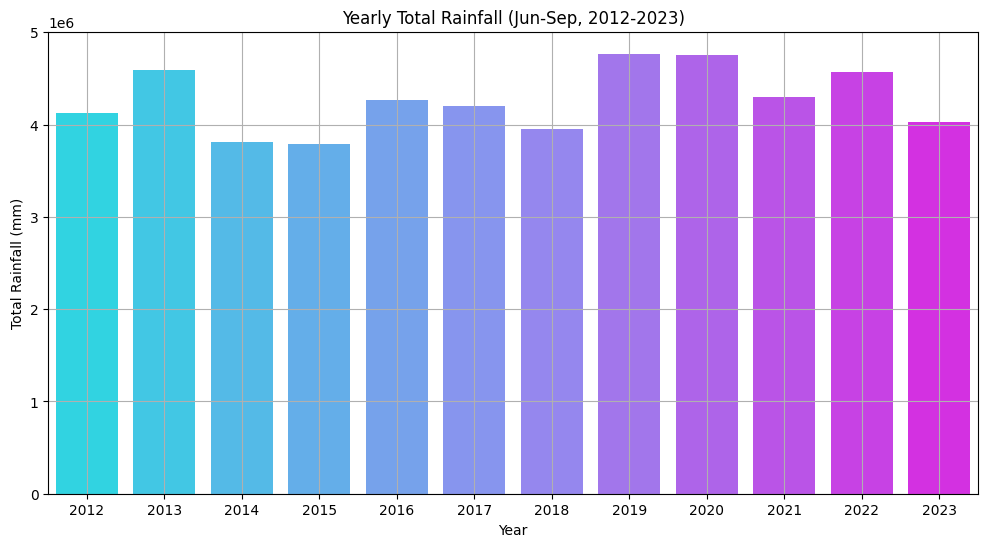

C:\Users\Lenoo\AppData\Local\Temp\ipykernel_5264\175197016.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rainfall_data, x='MONTH', y='RAINFALL', palette='Set3')


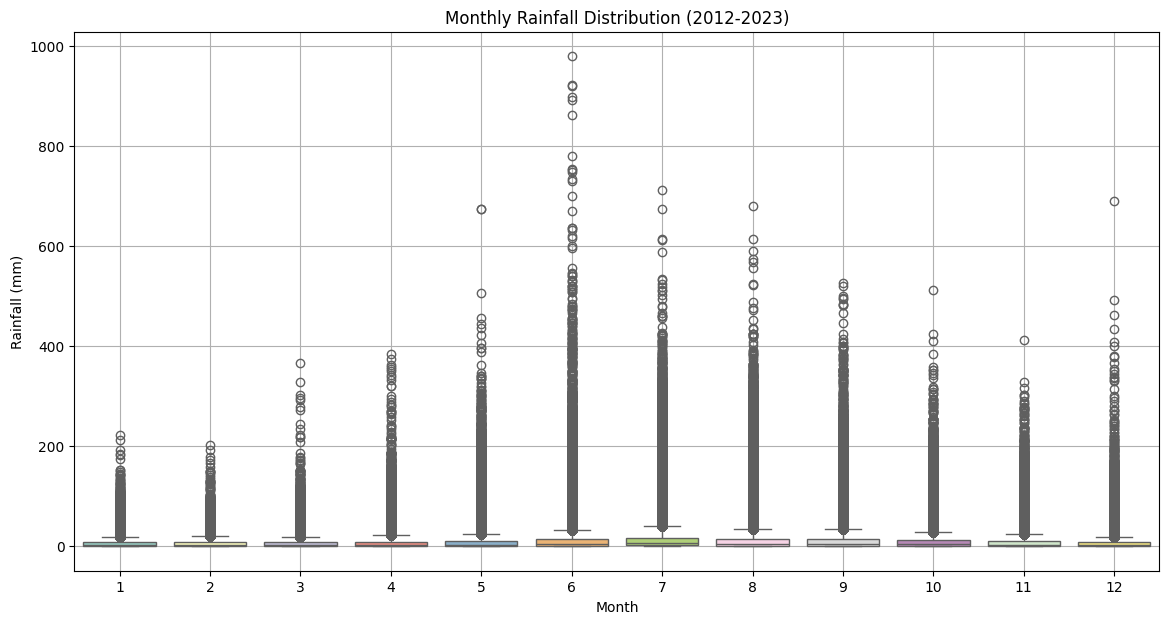

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process a single .nc file
def process_nc_file(file_path):
    dataset = xr.open_dataset(file_path)
    df = dataset.to_dataframe().reset_index()
    df['TIME'] = pd.to_datetime(df['TIME'])
    df['MONTH'] = df['TIME'].dt.month
    df['YEAR'] = df['TIME'].dt.year
    df = df[['YEAR', 'MONTH', 'LATITUDE', 'LONGITUDE', 'RAINFALL']]
    return df

# Paths to the .nc files for years 2012 to 2023
file_paths = [
    f"F:\\CSIR project\\RF25_ind{year}_rfp25.nc" for year in range(2012, 2024)
]

# Process all files and combine into a single DataFrame
rainfall_data = pd.concat([process_nc_file(fp) for fp in file_paths], ignore_index=True)

# Filter out NaN and 0.0 values in rainfall
rainfall_data = rainfall_data[(~rainfall_data['RAINFALL'].isna()) & (rainfall_data['RAINFALL'] > 0.0)]

# Insights and Trends

# 1. **Monthly Rainfall Trends (2012-2023)**
monthly_trends = rainfall_data.groupby(['YEAR', 'MONTH'])['RAINFALL'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='MONTH', y='RAINFALL', hue='YEAR', palette='viridis')
plt.title('Monthly Rainfall Trends (2012-2023)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. **Annual Rainfall Total**
annual_total = rainfall_data.groupby('YEAR')['RAINFALL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=annual_total, x='YEAR', y='RAINFALL', palette='coolwarm')
plt.title('Annual Total Rainfall (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

# 3. **Seasonal Analysis (Jun-Sep for each year)**
seasonal_data = rainfall_data[rainfall_data['MONTH'].isin([6, 7, 8, 9])]
seasonal_trends = seasonal_data.groupby(['YEAR', 'MONTH'])['RAINFALL'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=seasonal_trends, x='MONTH', y='RAINFALL', hue='YEAR', palette='Set2')
plt.title('Seasonal Rainfall (Jun-Sep) Trends (2012-2023)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. **Regions with Highest Rainfall**
highest_rainfall = rainfall_data[rainfall_data['RAINFALL'] > 50]

plt.figure(figsize=(10, 8))
plt.scatter(
    highest_rainfall['LONGITUDE'], 
    highest_rainfall['LATITUDE'], 
    c=highest_rainfall['RAINFALL'], 
    cmap='rainbow', 
    alpha=0.7
)
plt.colorbar(label='Rainfall (mm)')
plt.title('Regions with Rainfall > 50 mm (2012-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# 5. **Year-on-Year Comparison for Jun-Sep**
yearly_seasonal_total = seasonal_data.groupby(['YEAR'])['RAINFALL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_seasonal_total, x='YEAR', y='RAINFALL', palette='cool')
plt.title('Yearly Total Rainfall (Jun-Sep, 2012-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

# 6. **Monthly Distribution as a Boxplot**
plt.figure(figsize=(14, 7))
sns.boxplot(data=rainfall_data, x='MONTH', y='RAINFALL', palette='Set3')
plt.title('Monthly Rainfall Distribution (2012-2023)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

1. Seasonal Trends Analysis

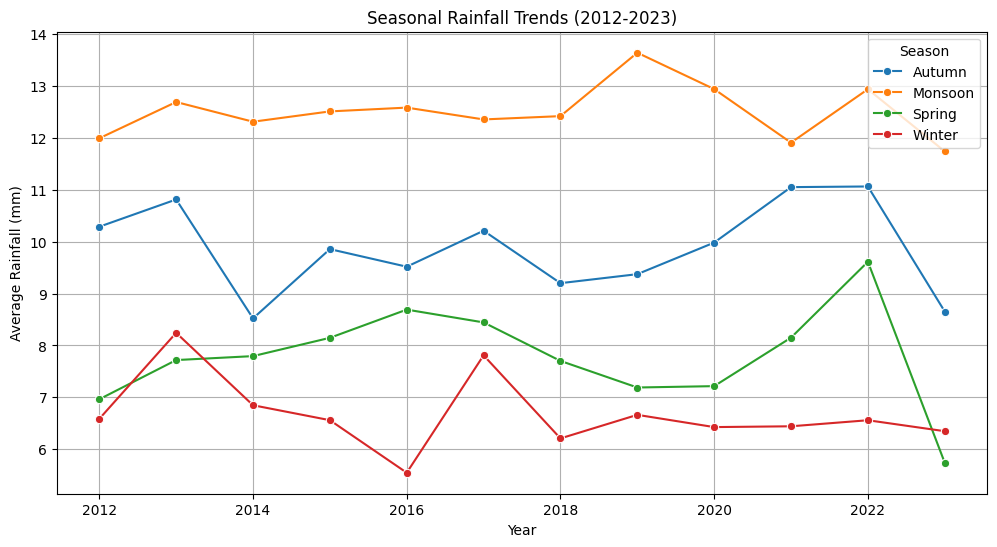

In [2]:
# Define seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

rainfall_data['SEASON'] = rainfall_data['MONTH'].apply(assign_season)

# Aggregate rainfall by season
seasonal_rainfall = rainfall_data.groupby(['SEASON', 'YEAR'])['RAINFALL'].mean().reset_index()

# Visualize seasonal rainfall trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_rainfall, x='YEAR', y='RAINFALL', hue='SEASON', marker='o')
plt.title('Seasonal Rainfall Trends (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.legend(title='Season')
plt.grid()
plt.show()

2. Heatmap of Monthly Rainfall by Year

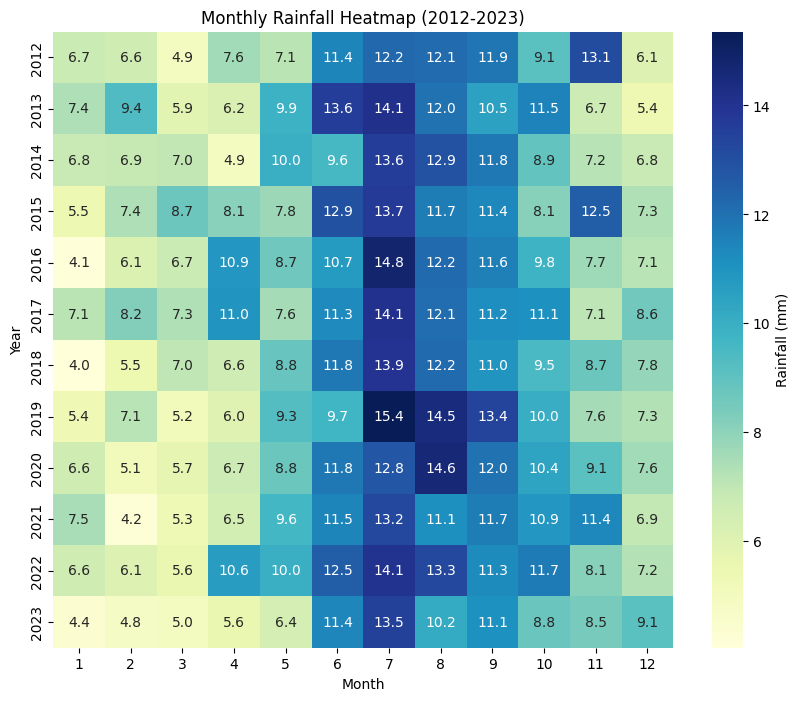

In [3]:
# Pivot table for heatmap
monthly_heatmap = rainfall_data.pivot_table(
    values='RAINFALL', index='YEAR', columns='MONTH', aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_heatmap, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Rainfall (mm)'})
plt.title('Monthly Rainfall Heatmap (2012-2023)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

3. Extreme Rainfall Events

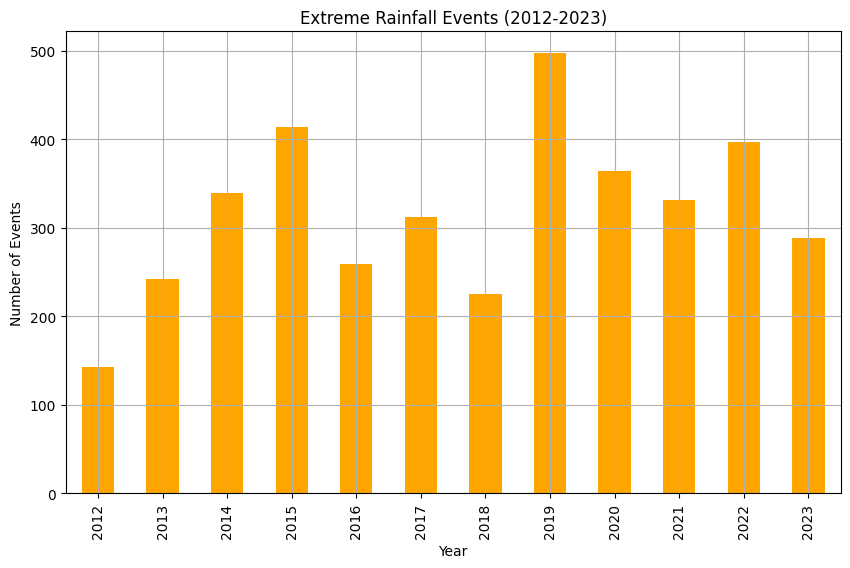

In [4]:
# Filter extreme rainfall events
extreme_events = rainfall_data[rainfall_data['RAINFALL'] > 200]

# Group by year and count extreme events
extreme_event_counts = extreme_events.groupby('YEAR').size()

# Plot extreme event counts
plt.figure(figsize=(10, 6))
extreme_event_counts.plot(kind='bar', color='orange')
plt.title('Extreme Rainfall Events (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid()
plt.show()

5. Yearly Rainfall Comparison

C:\Users\Lenoo\AppData\Local\Temp\ipykernel_5264\3152661701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_rainfall, x='YEAR', y='RAINFALL', palette='Blues_d')


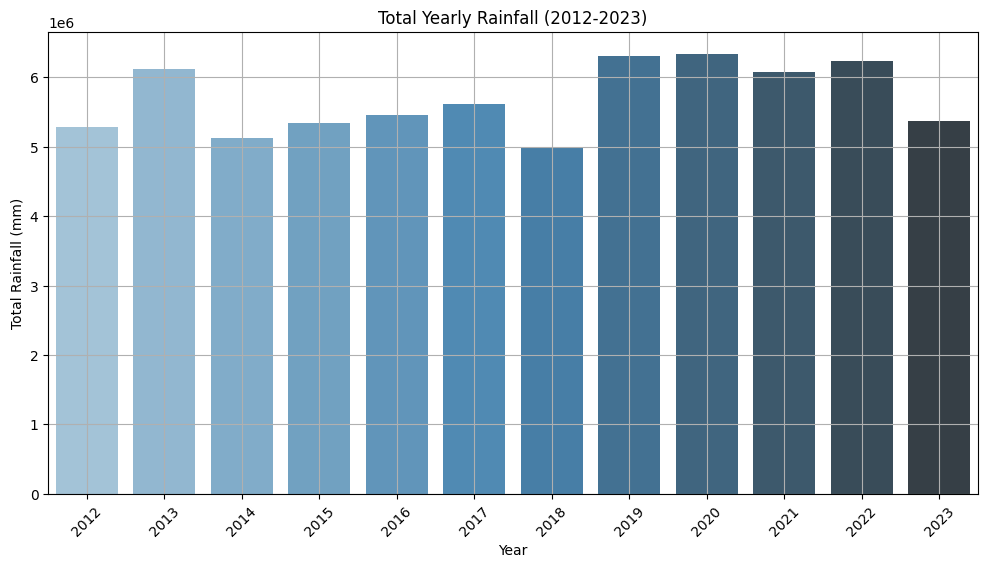

In [6]:
# Total yearly rainfall
yearly_rainfall = rainfall_data.groupby('YEAR')['RAINFALL'].sum().reset_index()

# Bar plot for yearly comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_rainfall, x='YEAR', y='RAINFALL', palette='Blues_d')
plt.title('Total Yearly Rainfall (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

6. Top Rainfall Regions

In [7]:
# Aggregate by location
top_regions = rainfall_data.groupby(['LATITUDE', 'LONGITUDE'])['RAINFALL'].sum().reset_index()

# Sort by rainfall
top_regions_sorted = top_regions.sort_values(by='RAINFALL', ascending=False).head(10)

# Display top regions
print("Top Rainfall Regions (2012-2023):")
print(top_regions_sorted)

Top Rainfall Regions (2012-2023):
      LATITUDE  LONGITUDE       RAINFALL
2960     25.25      91.25  115243.885915
2961     25.25      91.50  106129.545620
2959     25.25      91.00  104817.556091
2958     25.25      90.75   98965.076020
3053     25.50      91.00   91673.073048
3052     25.50      90.75   91525.830375
3054     25.50      91.25   88408.637917
2957     25.25      90.50   75202.145147
322      13.50      75.00   66572.801403
2962     25.25      91.75   65238.031792
